---
title: "Exploratory Data Analysis"
format:
    html: 
        code-fold: false
---

<!-- After digesting the instructions, you can delete this cell, these are assignment instructions and do not need to be included in your final submission.  -->

{{< include instructions.qmd >}} 

EDA is an important beginning step in any data science project. On this page we will look at distribtions, correlations, and uncover relationships between variables and ensure that data is ready for modeling. These insights will influence our modeling process. It is important that we dont model blindly.

In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap
import plotly.express as px
import scipy.stats as stats
from scipy.stats import ttest_ind, skew, kurtosis

In [192]:
df = pd.read_csv('../../data/processed-data/processed_df.csv')

## Univariate Analysis

Summary Statistics

In [193]:
df.describe().T

count          mean  \
Enrollment                                          501.0    568.892216   
Percent Female                                      501.0      0.488070   
Percent Male                                        501.0      0.511669   
Percent Neither Female nor Male                     501.0      0.000257   
Percent English Language Learners                   501.0      0.132874   
Percent Students with IEPs                          501.0      0.209673   
Economic Need Index                                 501.0      0.730691   
Percent Overage / Undercredited                     501.0      0.054353   
Percent in Temp Housing                             501.0      0.130513   
Percent HRA Eligible                                501.0      0.700184   
Teacher Percent - White                             501.0      0.430554   
Nearby Student Distance (mi)                        501.0      2.317565   
Percentage of Students Enrolled in an AP Course     501.0      0.291362   
Percentage of Students Enrolled in an Advanced ...  501.0      0.379705   
Percentage of Students Enrolled in a College Cr...  501.0      0.081681   
Percentage of Students Enrolled in Any Advanced...  501.0      0.571937   
Years of principal experience at this school        501.0      6.889421   
Percent of teachers with 3 or more years of exp...  501.0      0.795406   
Percent of Students Chronically Absent              501.0      0.417344   
Teacher Attendance Rate                             501.0      0.952104   
Metric Value - Average Regents Score - English      501.0     69.576398   
Metric Value - College and Career Preparatory C...  501.0      0.656958   
Metric Value - College Persistence                  501.0      0.485317   
Rigorous Instruction - Element Score                501.0      3.473640   
Collaborative Teachers - Element Score              501.0      3.612056   
Supportive Environment - Element Score              501.0      3.577099   
Effective School Leadership - Element Score         501.0      3.552355   
Strong Family-Community Ties - Element Score        501.0      3.442936   
Trust - Element Score                               501.0      3.392435   
Student Survey Response Rate                        501.0     66.850299   
Teacher Survey Response Rate                        501.0     80.932136   
Parent Survey Response Rate                         501.0     34.069860   
zip code                                            501.0  10715.345309   
Percent No High School (25+)                        501.0      9.221000   
Percent Bachelor's Degree or Higher (25+)           501.0     39.461876   
Percent Language Other Than English at Home         501.0     46.561000   
Percent Population with Disabilities                501.0     12.208800   
Percent Foreign-Born Population                     501.0     33.935329   
Percent Households with Broadband Internet          501.0     86.407600   
Median Household Income                             501.0  78499.157685   
Percent Households on SNAP/Food Stamps              501.0     23.808200   
dropout_rate                                        501.0      5.358034   
Graduation Rate                                     501.0      0.899607   
Student Percent - Black and Hispanic                501.0      0.799110   
Student Percent - Other                             501.0      0.183108   
District                                            501.0     25.339321   
Percent College Ready based on SAT Math             501.0      0.152992   
Average Grade 8 Proficiency                         501.0      2.753443   
CLEP_enrolled                                       501.0      0.017964   
IB_enrolled                                         501.0      0.039920   
NYCPS_college_prep_enrolled                         501.0      0.083832   
Took_ACT                                            501.0      0.223553   

                                                             std         min

### Transformations

View distribution of numerical features with histogram

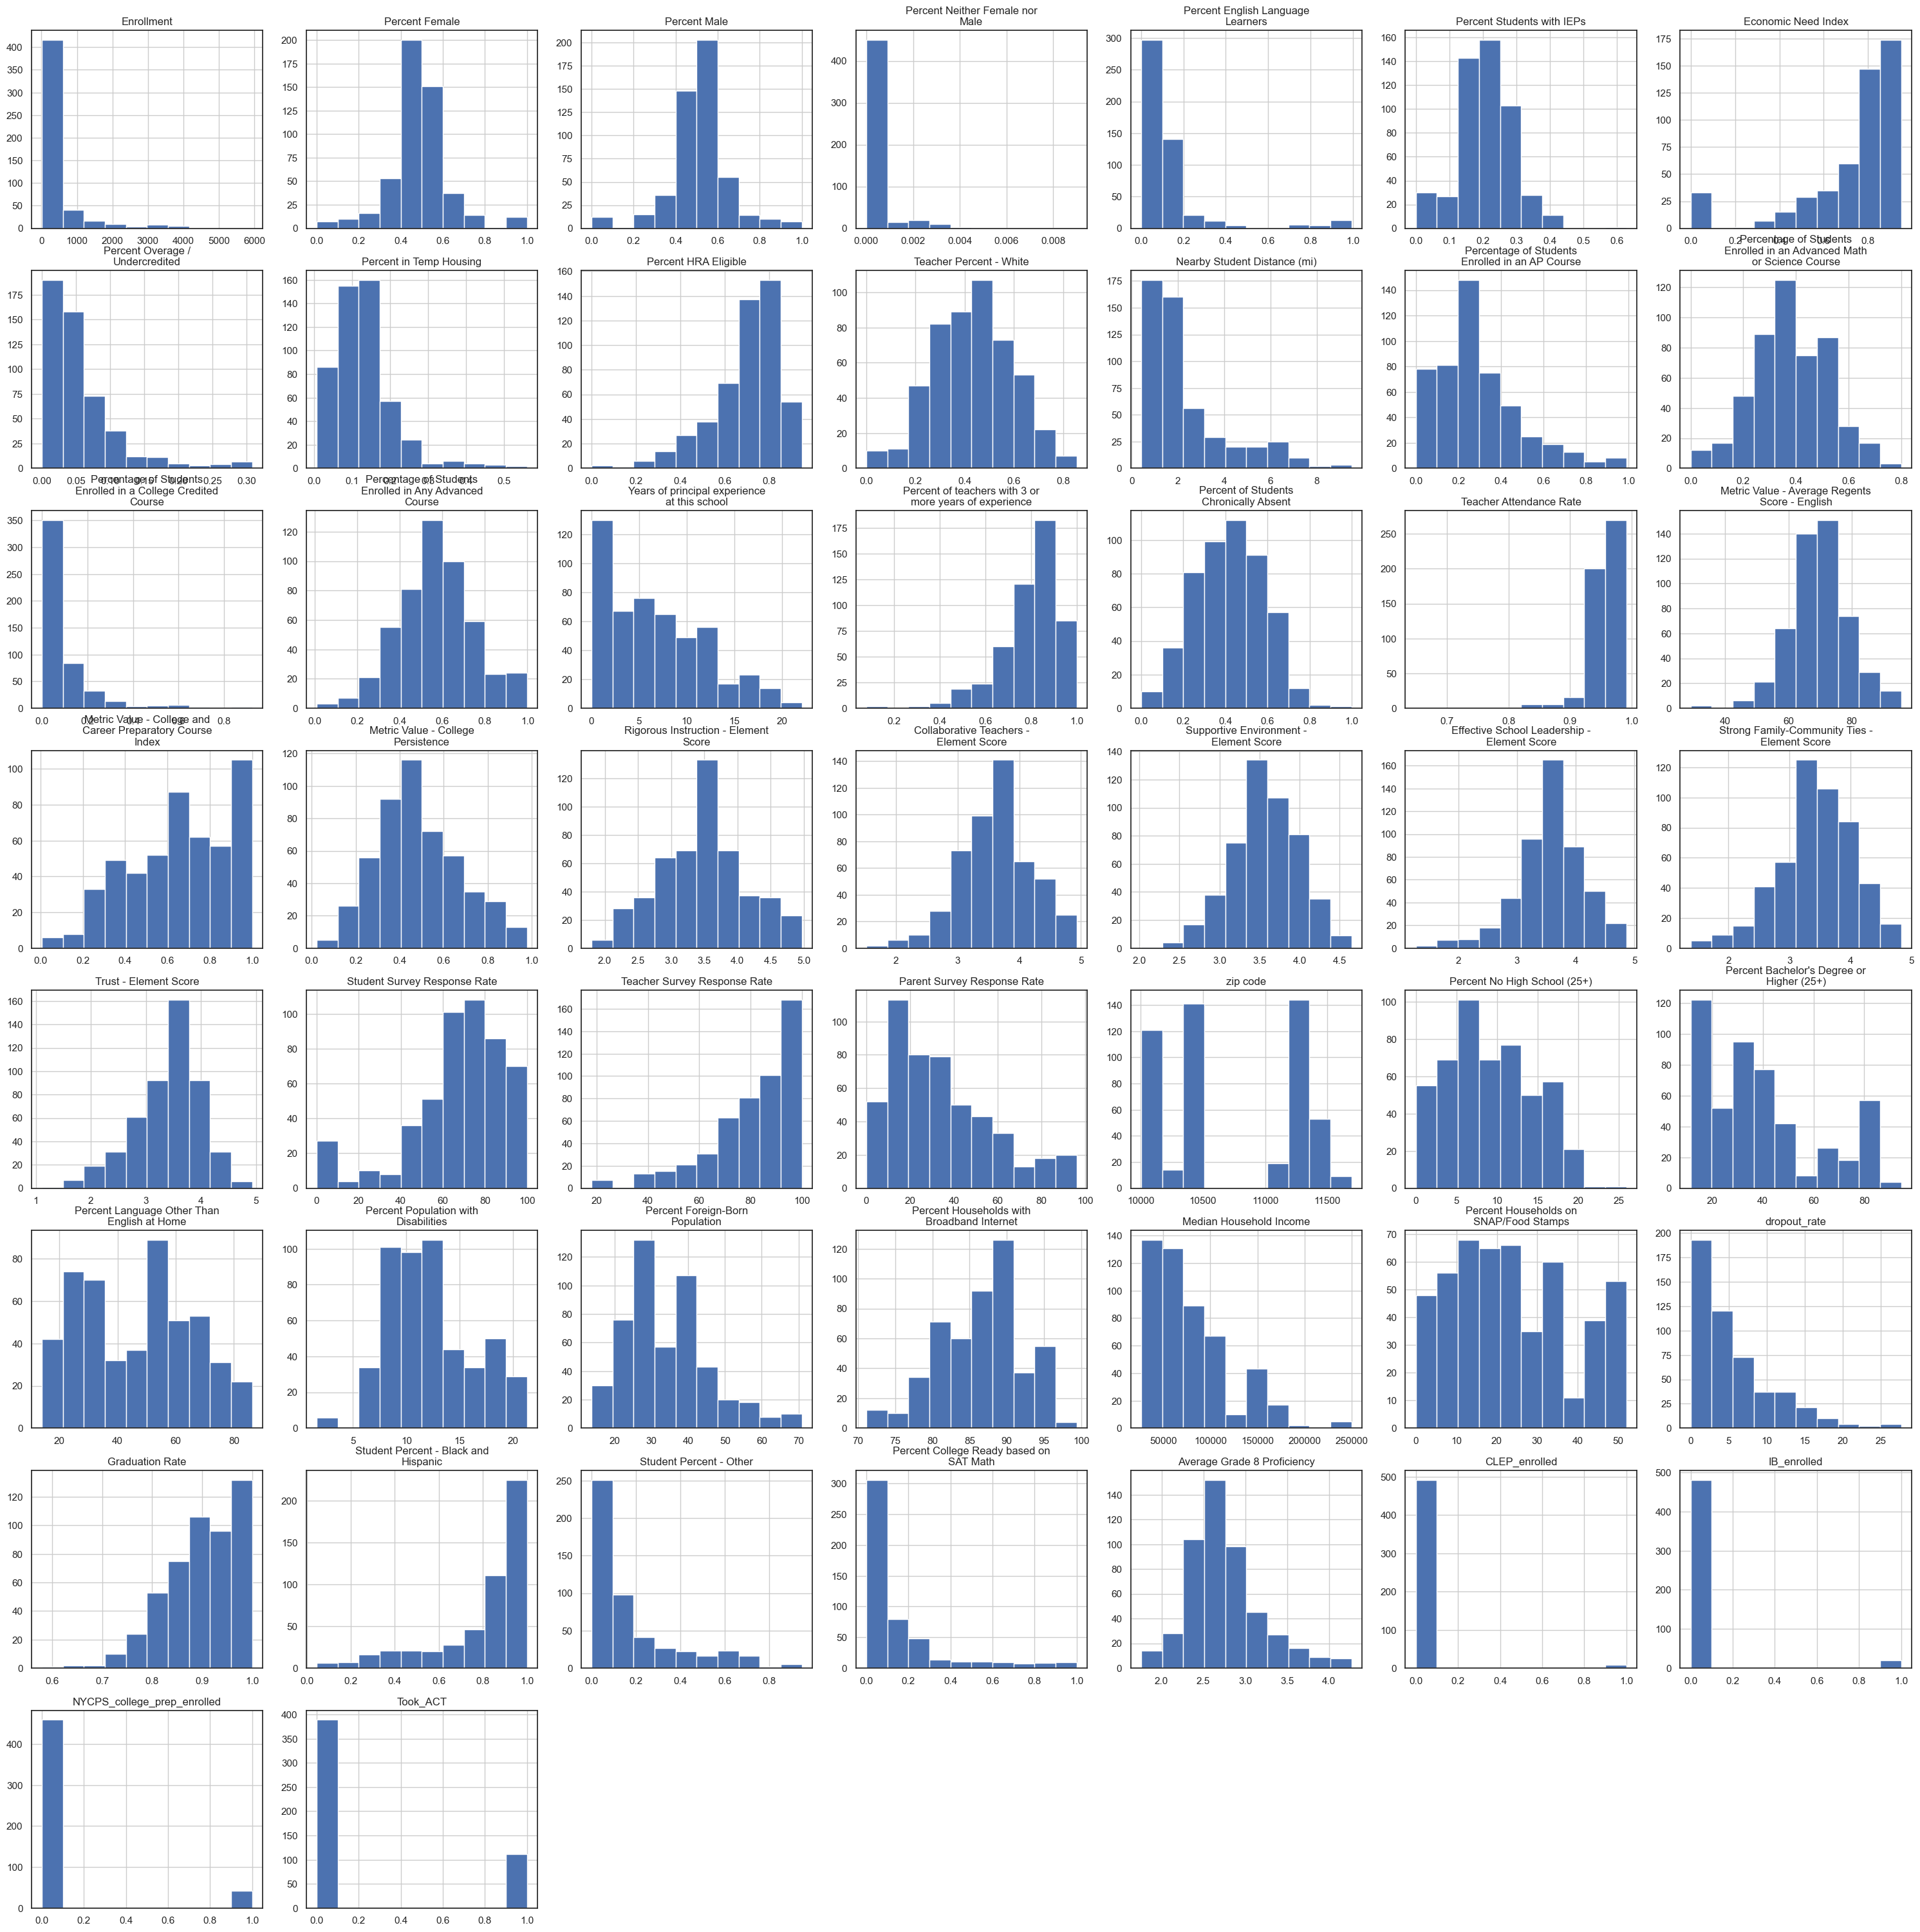

In [194]:
numerical_columns = df.select_dtypes(include=['float64']).columns

axes = df[numerical_columns].hist(figsize=(30, 30))
plt.tight_layout()

# wrap the titles for readability
for ax, col in zip(axes.flatten(), numerical_columns):
    wrapped_title = textwrap.fill(col, width=30)
    ax.set_title(wrapped_title)

plt.show()

Based on these distributions, we may want to transform some variables before modeling. Lets check the actual skews:

In [195]:
skewness = df.apply(lambda col: skew(col) if col.dtype != 'object' else None)

In [196]:
skewness.loc[abs(skewness) > 2]

Enrollment                                                      3.738744
Percent Neither Female nor Male                                 5.155183
Percent English Language Learners                               3.151075
Percent Overage / Undercredited                                 2.173497
Percentage of Students Enrolled in a College Credited Course    2.898833
Teacher Attendance Rate                                        -5.282616
Percent College Ready based on SAT Math                         2.235895
CLEP_enrolled                                                   7.258441
IB_enrolled                                                     4.700168
NYCPS_college_prep_enrolled                                     3.003344
dtype: float64

In [103]:
df_transformed = df.copy()

#log variables exhibiting the power law
df_transformed['log_ELL'] = np.log(df_transformed['Percent English Language Learners'] + 1)
df_transformed['log_dropout_rate'] = np.log(df_transformed['dropout_rate'] + 1)
df_transformed['log_temp_housing'] = np.log(df_transformed['Percent in Temp Housing'] + 1)
df_transformed['log_percent_overage'] = np.log(df_transformed['Percent Overage / Undercredited'] + 1)
df_transformed['log_enrollment'] = np.log(df_transformed['Enrollment'] + 1)
df_transformed['log_nearby_student_distance'] = np.log(df_transformed['Nearby Student Distance (mi)'] + 1)
df_transformed['log_college_ready_SAT_math'] = np.log(df_transformed['Percent College Ready based on SAT Math'] + 1)
df_transformed['log_student_percent_other'] = np.log(df_transformed['Student Percent - Other'] + 1)
df_transformed['log_household_income'] = np.log(df_transformed['Median Household Income'] + 1)

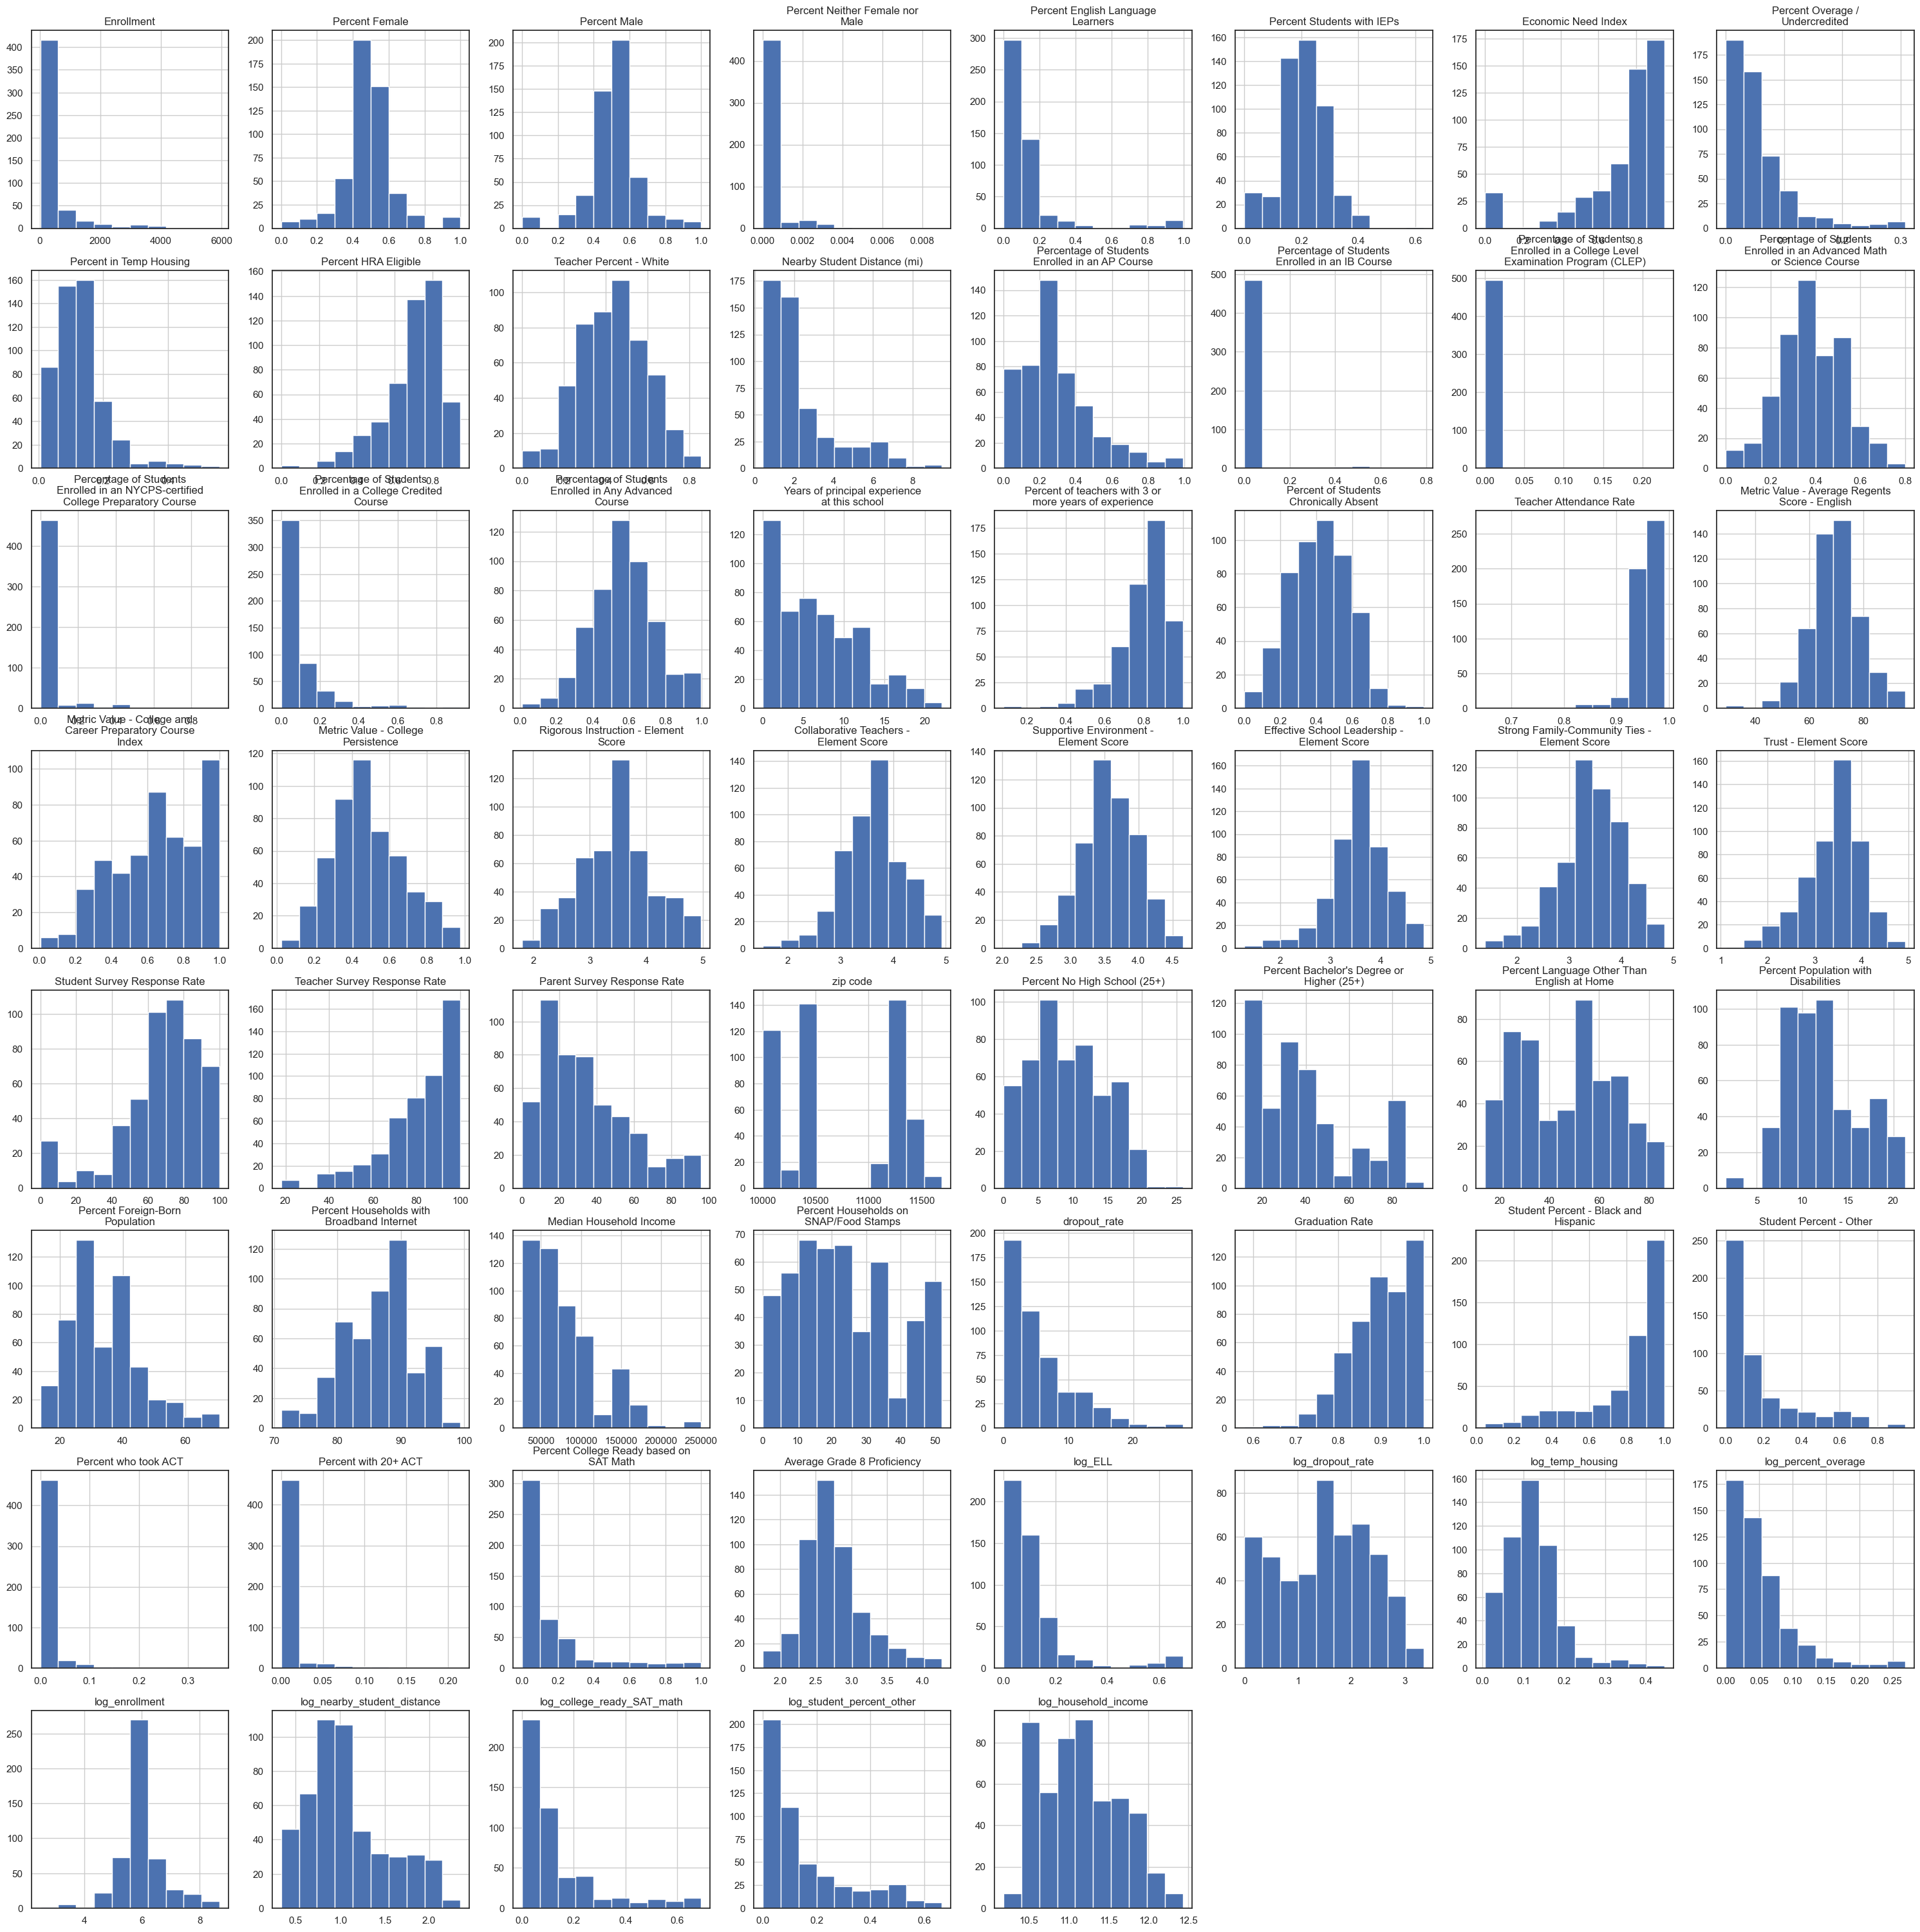

In [104]:
numerical_columns = df_transformed.select_dtypes(include=['float64']).columns

axes = df_transformed[numerical_columns].hist(figsize=(30, 30))
plt.tight_layout()

# wrap the titles for readability
for ax, col in zip(axes.flatten(), numerical_columns):
    wrapped_title = textwrap.fill(col, width=30)
    ax.set_title(wrapped_title)

plt.show()

### Multivariate Analysis

Visualize correlations with heatmap of all numeric columns

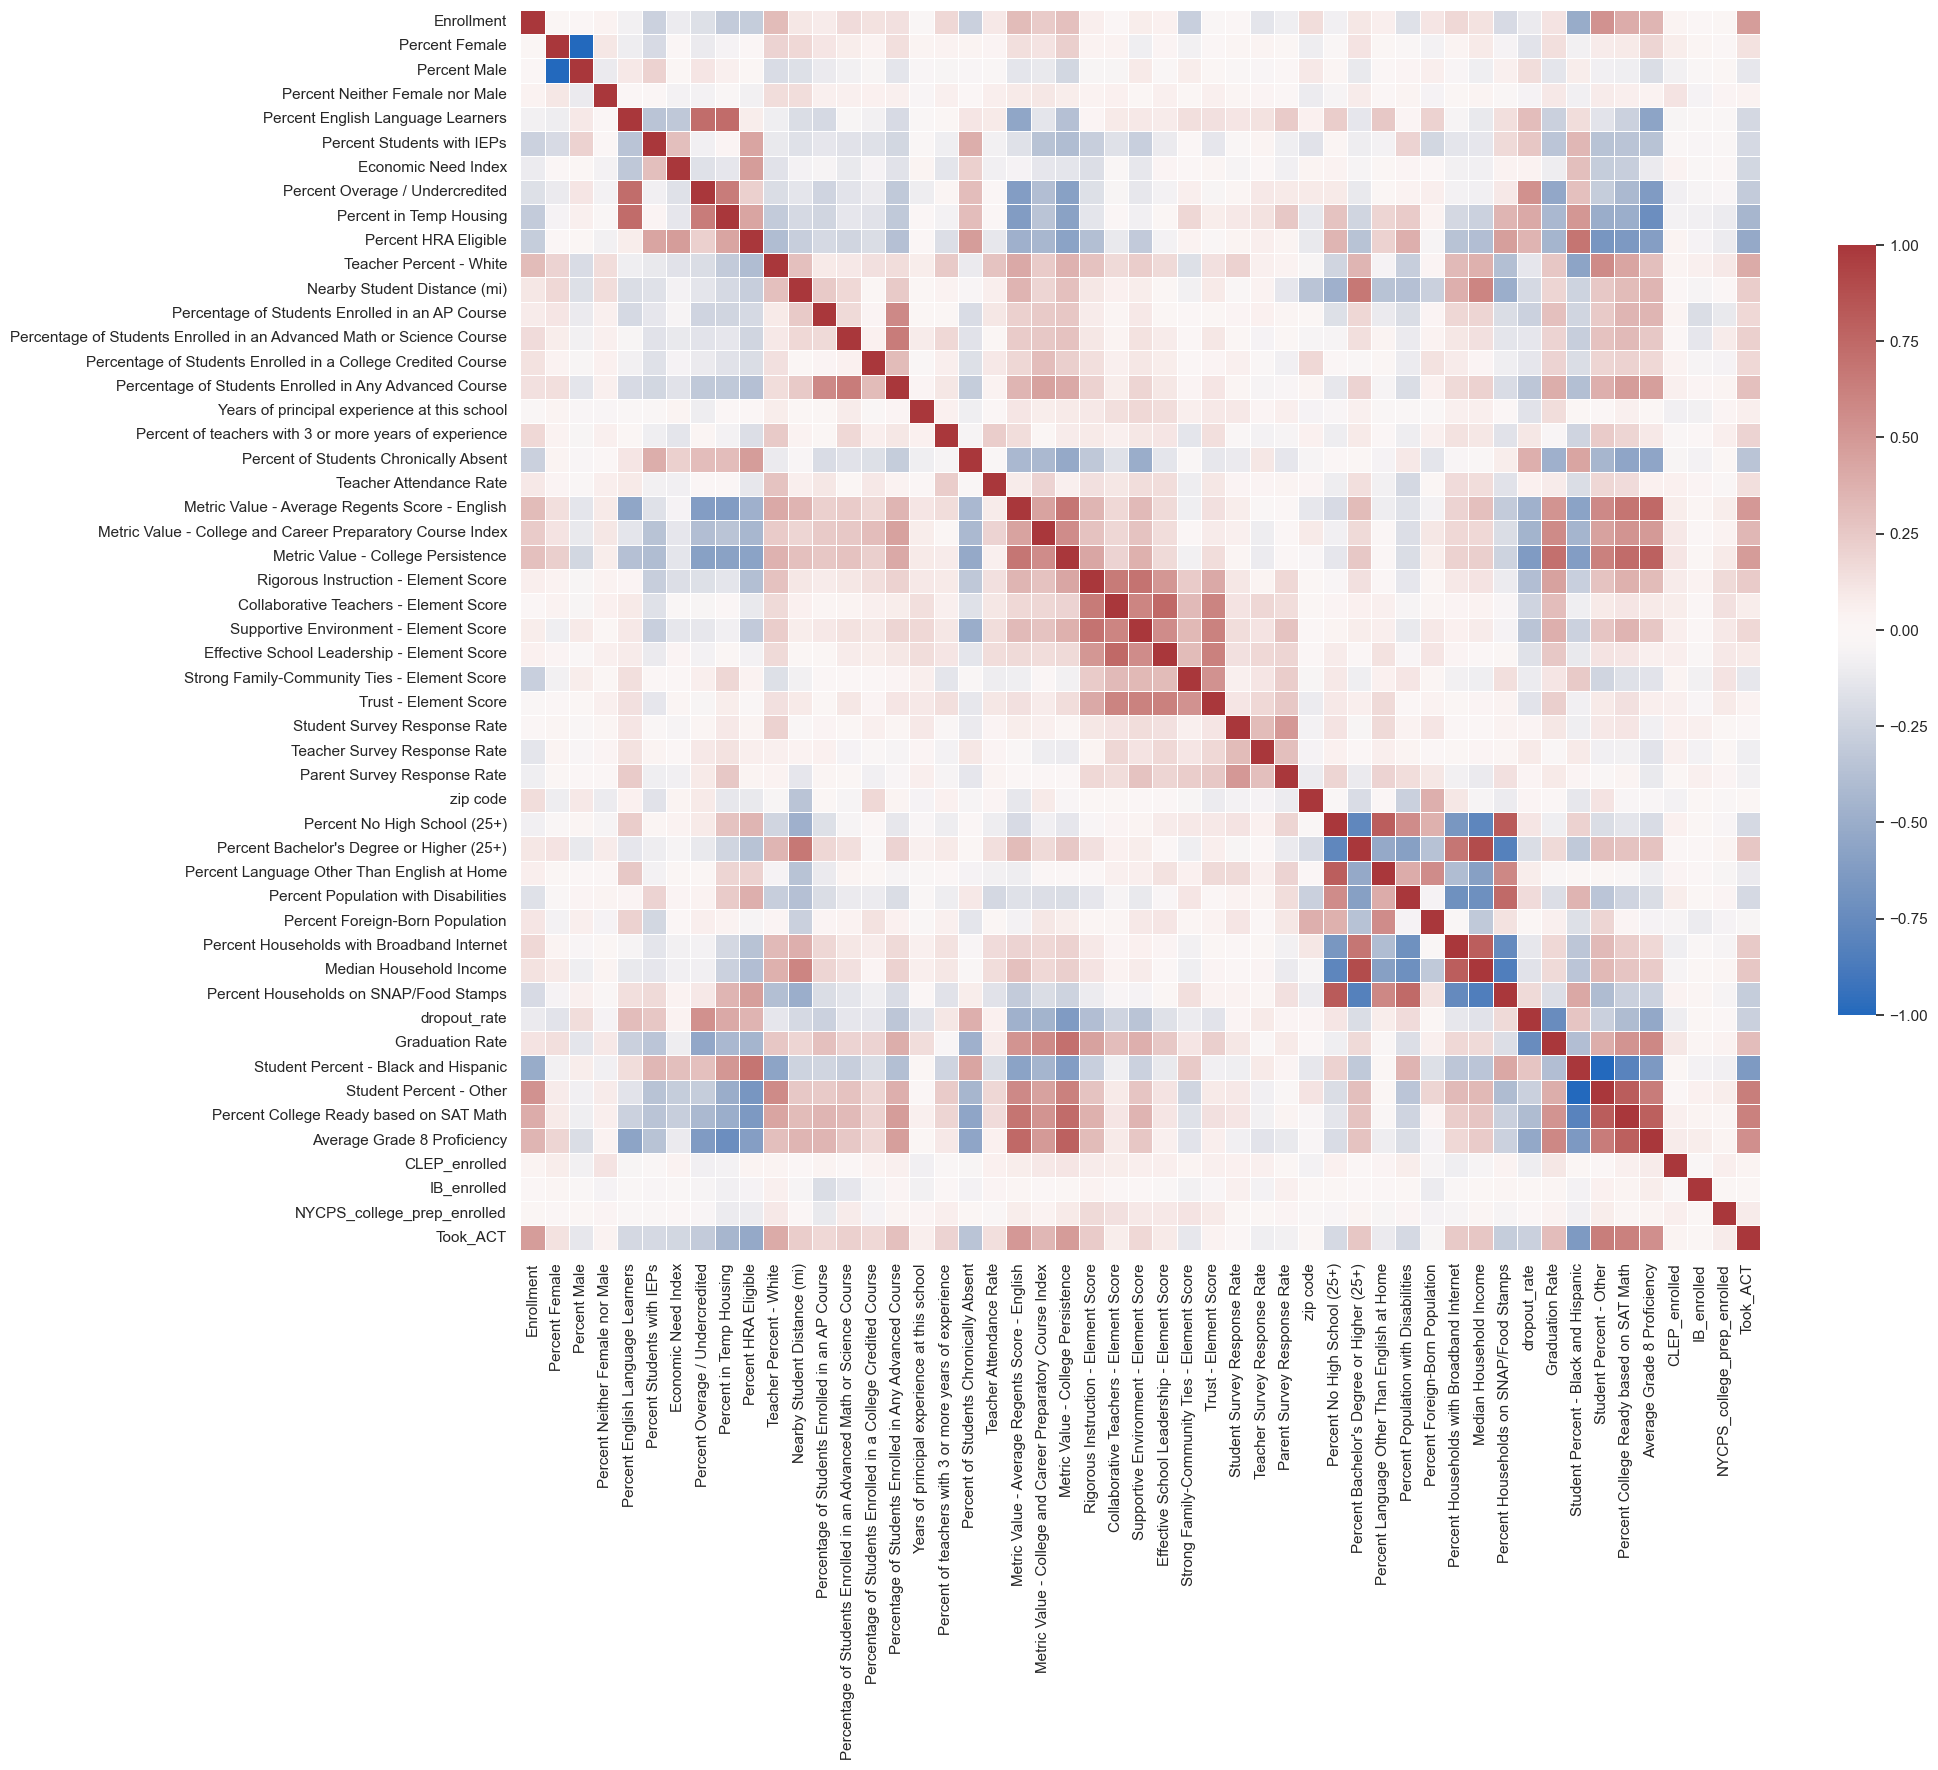

In [197]:
numeric_columns = df.select_dtypes(include=['float64'])
corr = numeric_columns.corr()
f, ax = plt.subplots(figsize=(20, 20))  
sns.heatmap(corr,  cmap='vlag', vmin=-1, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [21]:
numerical_columns = numerical_columns.drop(['School Name','DBN'])

## Statistical Testing

Lets try to uncover relationships between some of our target variables and features in the data

#### T-test
We will use a t test to evaluate if there is difference in the means of two groups

In [198]:
high_dropout = df[df['dropout_rate'] > 7.7]['Median Household Income']
low_dropout = df[df['dropout_rate'] <= 7.7]['Median Household Income']

t_stat, p_value = ttest_ind(high_dropout, low_dropout)
print(f't-value = {t_stat:.2f}, p-value = {p_value:.3f}')

t-value = -2.79, p-value = 0.006


Null Hypothesis: There is no difference in mean median household income between schools with high dropout and low dropout rates.

Alternative Hypothesis: There is a difference in mean median household income between schools with high and low droppout rates

The p-value is 0.006, allowing us to reject the null hypothesis and conclude that there is significant difference in the mean median household income of schools with high dropout rates vs low dropout rates.

In [216]:
high_chronic_absent = df[df['Percent of Students Chronically Absent'] > .4]['Supportive Environment - Element Score']
low_chronic_absent = df[df['Percent of Students Chronically Absent'] <= .4]['Supportive Environment - Element Score']

t_stat, p_value = ttest_ind(high_chronic_absent, low_chronic_absent)
print(f't-value = {t_stat:.2f}, p-value = {p_value:.3f}')

t-value = -11.44, p-value = 0.000


Null Hypothesis: There is no difference in mean supportive environment score between schools with high chronic absenteeism and low chronic absenteeism.

Alternative Hypothesis: There is a difference in mean supportive environment score between schools with high chronic absenteeism and low chronic absenteeism.


The p-value is less than 0.05, allowing us to reject the null hypothesis and conclude that there is significant difference in the mean supportive environment element score of schools with high chronic absenteeism vs low chronic absenteeism.

#### ANOVA

We will use an ANOVA test to evaluate if there is a difference in the means of more than two groups

In [199]:
df['college_persistence_ranking'] = pd.cut(df['Metric Value - College Persistence'], bins=3, labels=['Low','Medium','High'])

In [200]:
anova_result = f_oneway(
    df[df['college_persistence_ranking']=='Low']['Economic Need Index'],
    df[df['college_persistence_ranking']=='Medium']['Economic Need Index'],
    df[df['college_persistence_ranking']=='High']['Economic Need Index']
)
print(f'F value = {anova_result.statistic:.2f}, p-value = {anova_result.pvalue:.3f}')


F value = 21.57, p-value = 0.000


Null Hypothesis: There is no difference in mean economic need index between schools with high, medium, and low college persistence rates.

Alternative Hypothesis: There is a difference in mean economic need index between schools with high, medium, and low college persistence rates.

The p-value less than 0.05, allowing us to reject the null hypothesis and conclude that there is significant difference in the mean economic need index between at least one of the college persistence ranking groups (High, Medium, Low).

## Additional Visualizations

Taking a look at a box plot of dropout rates by borough, it is apparent that the Bronx has the highest rates of dropout. In addition, the median for Queens is low but there are some high outliers.

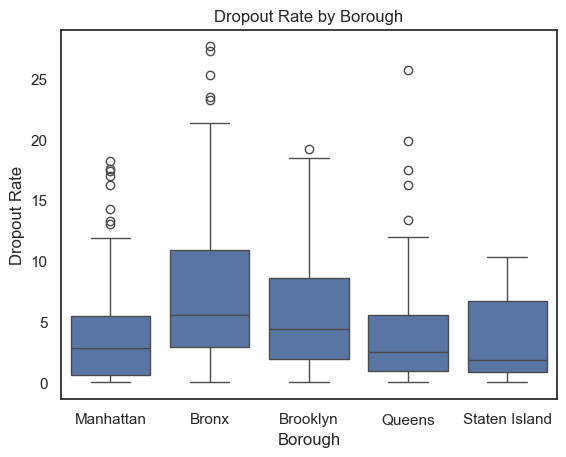

In [201]:
sns.boxplot(x='Borough', y='dropout_rate', data=df)
plt.title('Dropout Rate by Borough')
plt.ylabel('Dropout Rate')
plt.show()

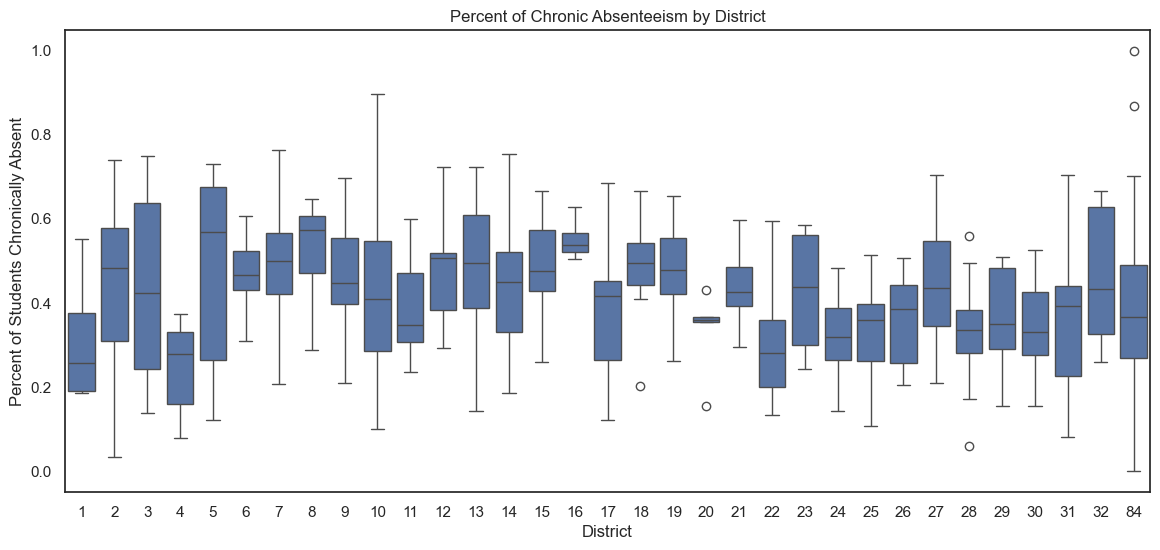

In [202]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='District', y='Percent of Students Chronically Absent')
plt.title('Percent of Chronic Absenteeism by District')
plt.show()

Certain districts clearly have higher medians and IQRs, especially some high spread and outliers in district 84

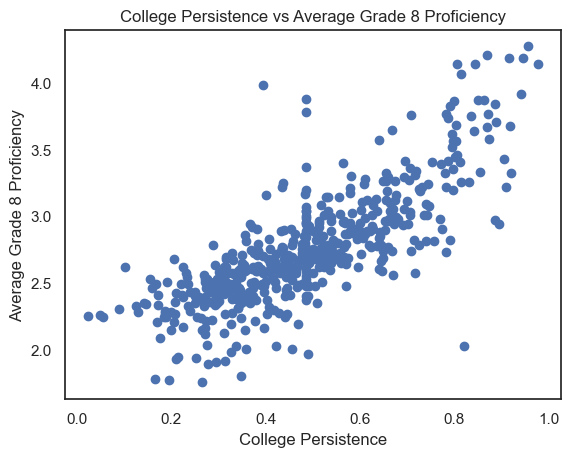

In [203]:
plt.scatter(data=df, x='Metric Value - College Persistence', y='Average Grade 8 Proficiency')
plt.title('College Persistence vs Average Grade 8 Proficiency')
plt.xlabel('College Persistence')
plt.ylabel('Average Grade 8 Proficiency')
plt.show()

It appears that high college persistence is associated with high average grade 8 proficiency. This emphasizes the importance of early intervention.

Lets take a look at how all three of our target metrics work together in this interactive plot

In [204]:
fig = px.scatter(df, x='Percent of Students Chronically Absent', y='dropout_rate', color='Metric Value - College Persistence')
fig.update_layout(title='Percent of Student Chronically Absent vs Dropout Rate', xaxis_title='Percent of Students Chronically Absent', yaxis_title='Dropout Rate')
fig.show()

It looks like high rates of college persistence are associated with low dropout rates and low percentages of student chronically absent - a motivating example of why we need to intervene to reduce these two metrics in order to maximize college persistence!

## Feature Selection

For further analysis, we will do some feature selection to help us prepare for modeling

Lets check what columns are most correlated with our regression target

In [205]:
target_column = 'Percent of Students Chronically Absent'

correlations = numeric_columns.corr()[target_column].sort_values(ascending=False)

positive_correlations = correlations[correlations > 0]
negative_correlations = correlations[correlations < 0]

print(positive_correlations.head(10).sort_values(ascending=False))
print(negative_correlations.sort_values(ascending=True).head(10)) 

Percent of Students Chronically Absent    1.000000
Percent HRA Eligible                      0.476284
Student Percent - Black and Hispanic      0.434400
Percent Students with IEPs                0.383127
dropout_rate                              0.379707
Percent in Temp Housing                   0.308445
Percent Overage / Undercredited           0.308356
Economic Need Index                       0.215888
Percent English Language Learners         0.110565
Teacher Survey Response Rate              0.102258
Name: Percent of Students Chronically Absent, dtype: float64
Average Grade 8 Proficiency                                  -0.558927
Percent College Ready based on SAT Math                      -0.554737
Metric Value - College Persistence                           -0.526158
Supportive Environment - Element Score                       -0.507653
Graduation Rate                                              -0.477225
Student Percent - Other                                      -0.441859
Met

In [206]:
features = df[[ "Percent of Students Chronically Absent",
    "Percent HRA Eligible",
    "Student Percent - Black and Hispanic",
    "Percent Students with IEPs",
    "dropout_rate",
    "Percent in Temp Housing",
    "Percent Overage / Undercredited",
    "Economic Need Index",
    "Percent English Language Learners",
    "Teacher Survey Response Rate",
    "Average Grade 8 Proficiency",
    "Percent College Ready based on SAT Math",
    "Metric Value - College Persistence",
    "Supportive Environment - Element Score",
    "Graduation Rate",
    "Metric Value - Average Regents Score - English",
    "Metric Value - College and Career Preparatory Course Index",
    "Took_ACT"]]

We can visualize these correlations using pairplot, we want to make sure there are no zero looking correlations, a big blob of dots with no apparent relationship

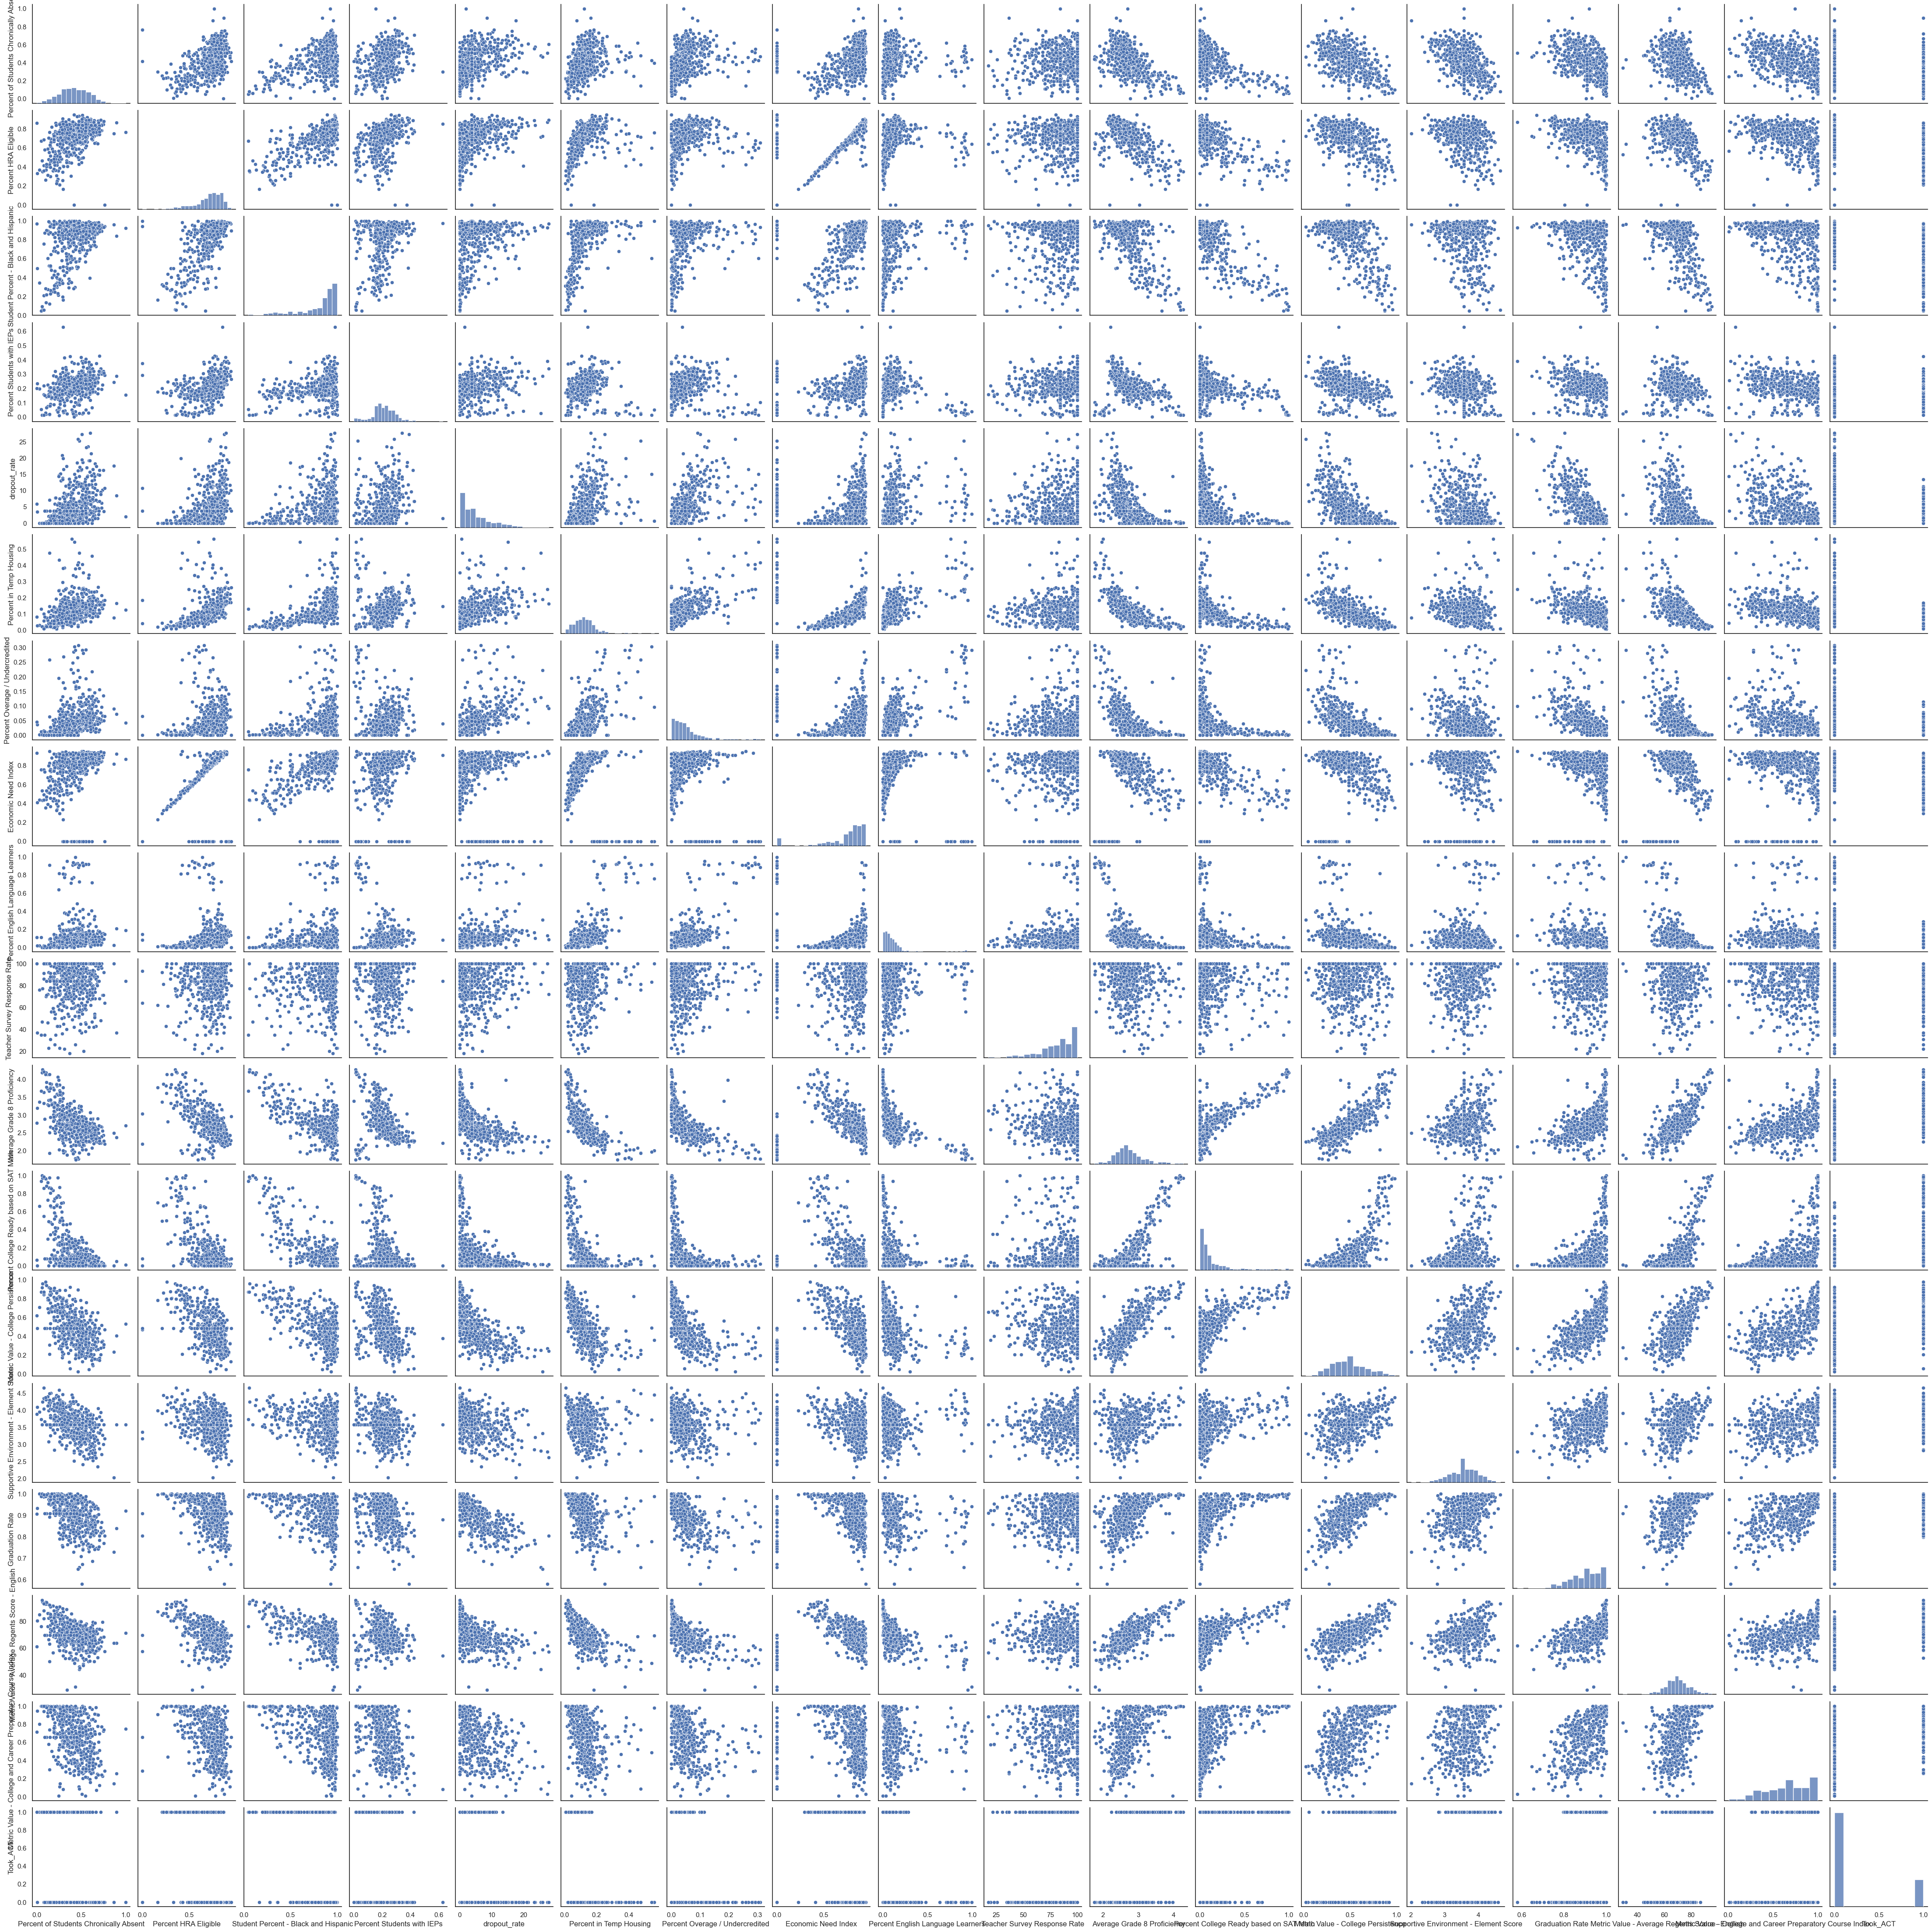

In [207]:
sns.pairplot(features)

Now we should check the pairwise correlations to ensure that we dont have variables that are too correlated to each other

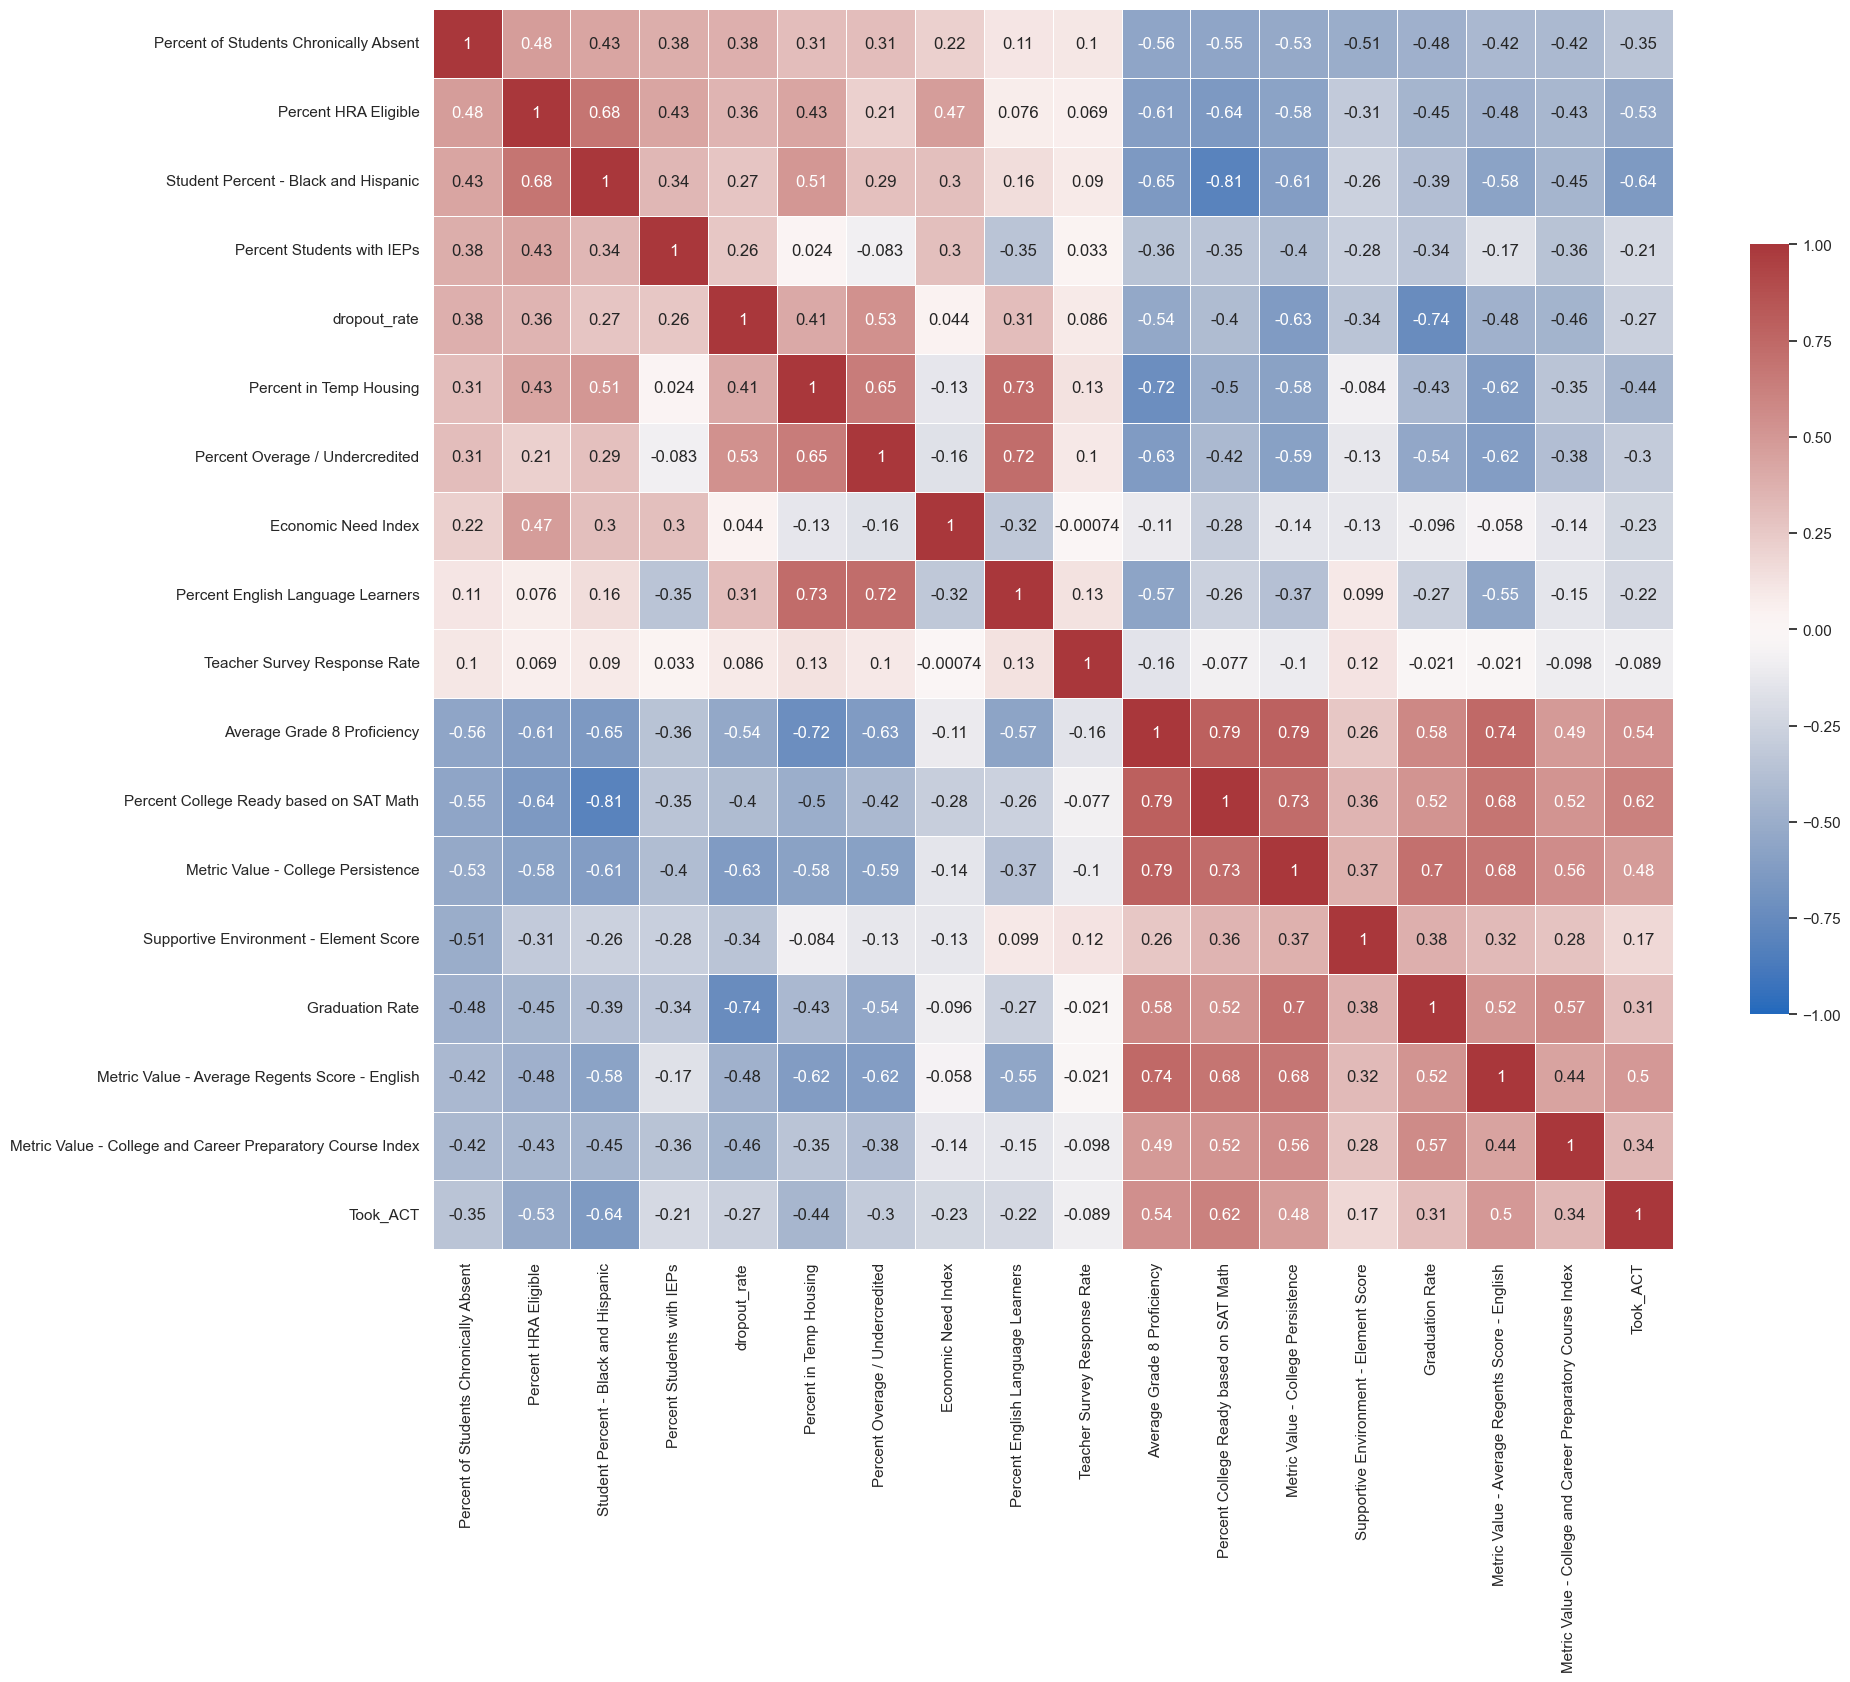

In [208]:
corr = features.corr()
f, ax = plt.subplots(figsize=(20, 20))  
sns.heatmap(corr,  cmap='vlag', annot=True, vmin=-1, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

There appears to be relationships with our target and all the features we have included, plus not too high correlations (nothing greater than |0.85|) between the features. Lets export this dataframe for our regression models.

In [210]:
features.to_csv('../../data/processed-data/df_subset_regression.csv', index=False)